## Data Exploratory Analysis

In [1]:
from sklearn.utils import shuffle
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

%matplotlib inline

In [2]:
data_pd = pd.read_csv("file:///home/jovyan/git/big-data-2-project/PS_20174392719_1491204439457_log.csv")

In [3]:
data_pd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data_pd['nameOrig'].nunique()

6353307

In [5]:
data_pd['nameDest'].nunique()

2722362

In [6]:
corr_pd = data_pd.drop(columns=['step', 'type', 'isFraud', 'isFlaggedFraud'], axis=1)

In [7]:
corr_pd.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000


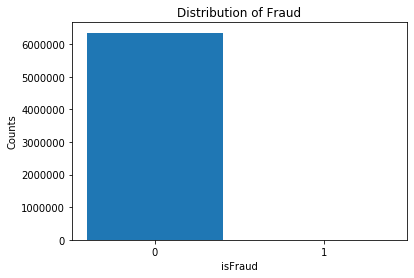

In [8]:
labels, counts = np.unique(data_pd['isFraud'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('isFraud')
plt.ylabel('Counts')
plt.title('Distribution of Fraud')
plt.show()

In [9]:
data_pd[data_pd['isFraud'] == 1].count()['isFraud']

8213

In [10]:
data_pd[data_pd['isFraud'] == 1].count()['isFraud'] / data_pd['isFraud'].count()

0.001290820448180152

Text(0, 0.5, 'Counts')

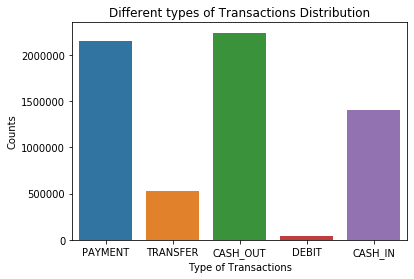

In [11]:
import seaborn as sns
figure2 = sns.countplot(x="type", data=data_pd)
figure2.set_title('Different types of Transactions Distribution')
figure2.set_xlabel('Type of Transactions')
figure2.set_ylabel('Counts')

In [12]:
data_pd['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
data_pd[data_pd['type'] == 'CASH_OUT'].count()['type'] / data_pd['type'].count()

0.35166330851127364

In [14]:
data_pd[data_pd['type'] == 'PAYMENT'].count()['type'] / data_pd['type'].count()

0.3381460781879163

In [15]:
data_pd[data_pd['type'] == 'CASH_IN'].count()['type'] / data_pd['type'].count()

0.21992261049693365

In [16]:
data_pd[data_pd['type'] == 'TRANSFER'].count()['type'] / data_pd['type'].count()

0.08375621992198183

In [17]:
data_pd[data_pd['type'] == 'DEBIT'].count()['type'] / data_pd['type'].count()

0.006511782881894566

Text(0, 0.5, 'Counts')

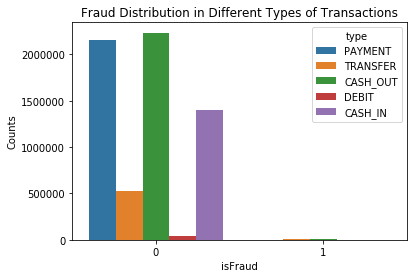

In [18]:
figure3 = sns.countplot(x="isFraud", hue="type", data=data_pd)
figure3.set_title('Fraud Distribution in Different Types of Transactions')
figure3.set_xlabel('isFraud')
figure3.set_ylabel('Counts')

In [19]:
data_fraud = data_pd[data_pd['isFraud'] == 1]

In [20]:
data_fraud['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

Text(0, 0.5, 'Counts')

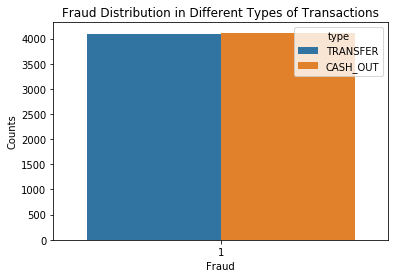

In [21]:
figure4 = sns.countplot(x="isFraud", hue="type", data=data_fraud)
figure4.set_title('Fraud Distribution in Different Types of Transactions')
figure4.set_xlabel('Fraud')
figure4.set_ylabel('Counts')

In [22]:
data_fraud[data_fraud['type'] == 'CASH_OUT'].count()['type'] / data_fraud['type'].count()

0.5011567027882625

In [23]:
data_fraud[data_fraud['type'] == 'TRANSFER'].count()['type'] / data_fraud['type'].count()

0.4988432972117375

Create a categorical variable "CusToCus" with levels "CC" (Customer to Customer), "CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

In [24]:
data_pd["CusToCus"] = data_pd['nameOrig'].str[0]+data_pd['nameDest'].str[0]

Text(0, 0.5, 'Counts')

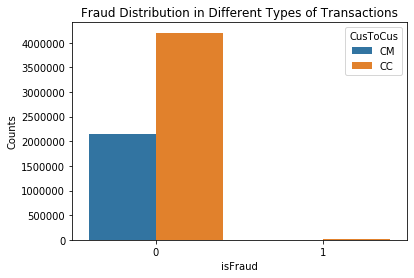

In [25]:
figure5 = sns.countplot(x="isFraud", hue="CusToCus", data=data_pd)
figure5.set_title('Fraud Distribution in Different Types of Transactions')
figure5.set_xlabel('isFraud')
figure5.set_ylabel('Counts')

In [26]:
data_pd['OrigDiff'] = data_pd['newbalanceOrig'] - data_pd['oldbalanceOrg']

In [27]:
data_pd['DestDiff'] = data_pd['newbalanceDest'] - data_pd['oldbalanceDest']

In [28]:
data_pd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CusToCus,OrigDiff,DestDiff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,CM,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,CM,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,CC,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,CC,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,CM,-11668.14,0.0


In [29]:
data_update = pd.concat([data_pd, pd.get_dummies(data_pd['type'], prefix='type')],axis=1)

In [30]:
data_update['AmountEqOrig'] = np.where(data_update['amount'] == data_update['oldbalanceOrg'], 'equal', 'unequal')

In [31]:
data_update.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CusToCus,OrigDiff,DestDiff,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,AmountEqOrig
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,CM,-9839.64,0.0,0,0,0,1,0,unequal
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,CM,-1864.28,0.0,0,0,0,1,0,unequal
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,CC,-181.00,0.0,0,0,0,0,1,equal
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,CC,-181.00,-21182.0,0,1,0,0,0,equal
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,CM,-11668.14,0.0,0,0,0,1,0,unequal


In [32]:
data_fraud = data_update[data_update['isFraud'] == 1]

Text(0, 0.5, 'Counts')

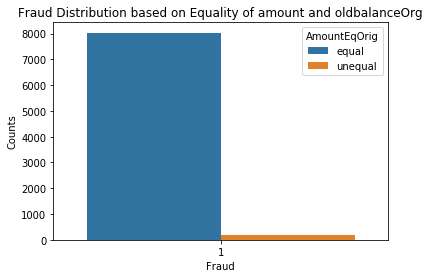

In [33]:
figure6 = sns.countplot(x="isFraud", hue="AmountEqOrig", data=data_fraud)
figure6.set_title('Fraud Distribution based on Equality of amount and oldbalanceOrg')
figure6.set_xlabel('Fraud')
figure6.set_ylabel('Counts')